In [242]:
#Importing our Packages
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as rmse

df = pd.read_csv('sample_data/sample200.csv')

/home/julienlefebvre/.pyenv/versions/3.8.6/envs/Housing/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# First Prediction on Housing Dataset

In [243]:
#Filter to only get houses for simplicity ,'Appartement'
df = df[(df['type_local'].isin(['Maison']))
        &df['nature_mutation'].isin(['Vente'])
        #&df['code_postal'].between(10000,20000)
       ]
#df = df.valeur_fonciere.sort_values(ascending=False)
df.head(10)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
1,2020-154415,8/11/2020,1,Vente,10000,11,NaN,LE BOURG,B013,18140,...,Maison,43,2,S,sols,NaN,NaN,205,2.873,47.144
8,2016-143220,9/21/2016,1,Vente,185000,25,NaN,RUE SOUS LE FORT,0126,13660,...,Maison,94,6,S,sols,NaN,NaN,741,5.039,43.787
12,2020-144917,6/11/2020,1,Vente,153290,23,NaN,RUE DU CLOS MELET,0948,17100,...,Maison,78,4,S,sols,NaN,NaN,333,-0.657,45.743
14,2019-1174541,9/26/2019,1,Vente,76000,1,NaN,RUE DE LA PASTOURELLE,0043,79370,...,Maison,76,4,S,sols,NaN,NaN,617,-0.219,46.259
17,2016-754879,7/28/2016,1,Vente,52000,5,NaN,IMP DES VIOLETTES,0193,62150,...,Maison,75,4,S,sols,NaN,NaN,428,2.610,50.424
19,2017-241823,2/28/2017,1,Vente,178000,4,NaN,RUE TANGUY MALMANCHE,4381,22000,...,Maison,112,4,S,sols,NaN,NaN,415,-2.746,48.494
20,2016-1021086,5/13/2016,1,Vente,370000,9337,NaN,RUE BLAISE PASCAL,0457,83310,...,Maison,80,4,S,sols,NaN,NaN,428,6.521,43.254
22,2017-201399,4/18/2017,1,Vente,310000,22,NaN,BD DE LA PLAGE,0610,17370,...,Maison,85,5,S,sols,NaN,NaN,500,-1.202,45.837
25,2016-1003876,2/5/2016,1,Vente,165000,6,NaN,RUE DES PRETRES,0150,80910,...,Maison,73,4,J,jardins,NaN,NaN,882,2.677,49.749
26,2019-1133957,7/23/2019,1,Vente,269000,13,G,RUE PASTEUR,0280,77100,...,Maison,112,5,S,sols,NaN,NaN,458,2.859,48.928


(array([229.,  62.,  73.,  63., 196., 108.,  78.,  67., 297.,  47., 122.,
         71., 279.,  70.,  93., 130., 391.,  96., 117.,  78., 384.,  81.,
        119., 106., 589.]),
 array([20000., 21200., 22400., 23600., 24800., 26000., 27200., 28400.,
        29600., 30800., 32000., 33200., 34400., 35600., 36800., 38000.,
        39200., 40400., 41600., 42800., 44000., 45200., 46400., 47600.,
        48800., 50000.]),
 <BarContainer object of 25 artists>)

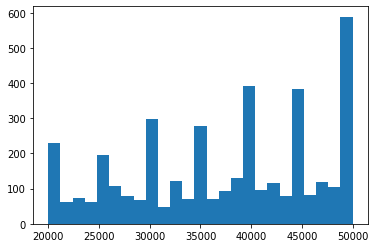

In [244]:
#Get Houses only within a certain price range to remove extreme and dummy values

df = df[df.valeur_fonciere.between(20000,50000)]
df = df[df.surface_reelle_bati > 10]
score= zscore(df.valeur_fonciere)
df2 = df[zscore(df.valeur_fonciere)<2]
plt.hist(df2.valeur_fonciere,bins=25)

In [245]:
df2 =df2.dropna(axis=1)
df2 =df2.select_dtypes(exclude=['object'])
X = df2.drop(columns=['numero_disposition','numero_volume','adresse_numero','valeur_fonciere'])
y = df2.valeur_fonciere

In [246]:
#Performing normal train test split on the formatted data (both X and target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Defining our PCA model and converting our data into components
pca_model = PCA(n_components=5)
converted = pca_model.fit(X)
X = converted.transform(X)

In [247]:
#Do the first basic models 
la= Lasso()
ri = Ridge()
lr = LinearRegression()
models = [la,ri,lr]
for model in models:
    fitter = model.fit(X_train,y_train)
    print(f"{model} R2 score is: {np.round(model.score(X_test, y_test),3)})")
    print(f"{model} rmse score is: {np.round(rmse(model.predict(X_test),y_test),3)})")
    print(f"{model} mape score is: {np.round(mape(model.predict(X_test),y_test),3)}"  )                                                          

Lasso() R2 score is: 0.01)
Lasso() rmse score is: 89686191.174)
Lasso() mape score is: 0.217
Ridge() R2 score is: 0.01)
Ridge() rmse score is: 89639510.956)
Ridge() mape score is: 0.217
LinearRegression() R2 score is: 0.01)
LinearRegression() rmse score is: 89633535.17)
LinearRegression() mape score is: 0.217


/home/julienlefebvre/.pyenv/versions/3.8.6/envs/Housing/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113755537084.58281, tolerance: 23188293.35004548
  model = cd_fast.enet_coordinate_descent(


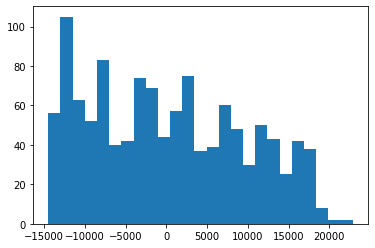

,pred,valeur_fonciere
pred,1.000000,0.104216
valeur_fonciere,0.104216,1.000000


In [249]:
#Print the residual errors histogram for inspection
model2 = model.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred = y_pred.astype('int')
error = np.subtract(y_pred, y_test)
df4=pd.DataFrame(y_test)
df4.insert(0,'pred', y_pred)
plot =plt.hist(error, bins=25)
plt.show()
df4.corr()